In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv(r'C:\Users\Thanuja\Desktop\Data.csv')

In [3]:
df

,Id,Sentence,Target
0,1,The classroom was a zoo.,Metaphor
1,2,The stars were diamonds in the sky.,Metaphor
2,3,Time is a thief that steals our moments.,Metaphor
3,4,Life is a journey with many paths.,Metaphor
4,5,Her mind was a maze of thoughts.,Metaphor
...,...,...,...
386,387,Her eyes were as wide as saucers.,Simile
387,388,The tree was as tall as a skyscraper.,Simile
388,389,The car was as fast as lightning.,Simile
389,390,The sun was as bright as gold.,Simile


In [4]:
df.shape

(391, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        391 non-null    int64 
 1   Sentence  391 non-null    object
 2   Target    391 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.3+ KB


In [6]:
df.isnull().sum()

Id          0
Sentence    0
Target      0
dtype: int64

In [7]:
X = df['Sentence']
y = df['Target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

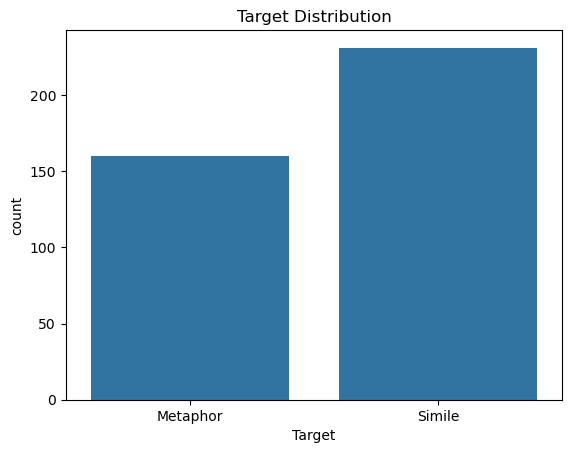

In [8]:
sns.countplot(x='Target',data=df)
plt.title('Target Distribution')
plt.show()


Bivariate Analysis


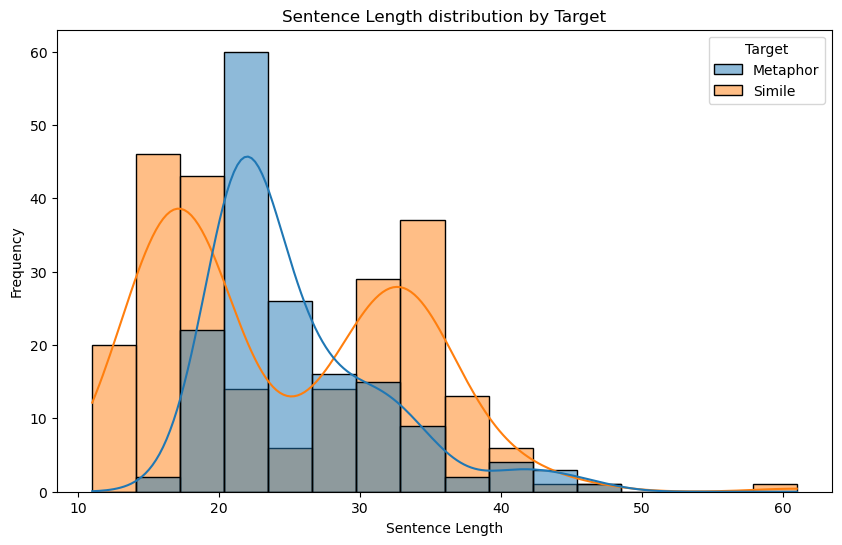

In [9]:
df['sentence_length'] = df['Sentence'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df,x='sentence_length' , hue='Target' , kde=True)
plt.title('Sentence Length distribution by Target')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Thanuja\AppData\Local\Temp\ipykernel_30524\1595075779.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature', x='importance', data=top_positive_features.head(20), palette='viridis')


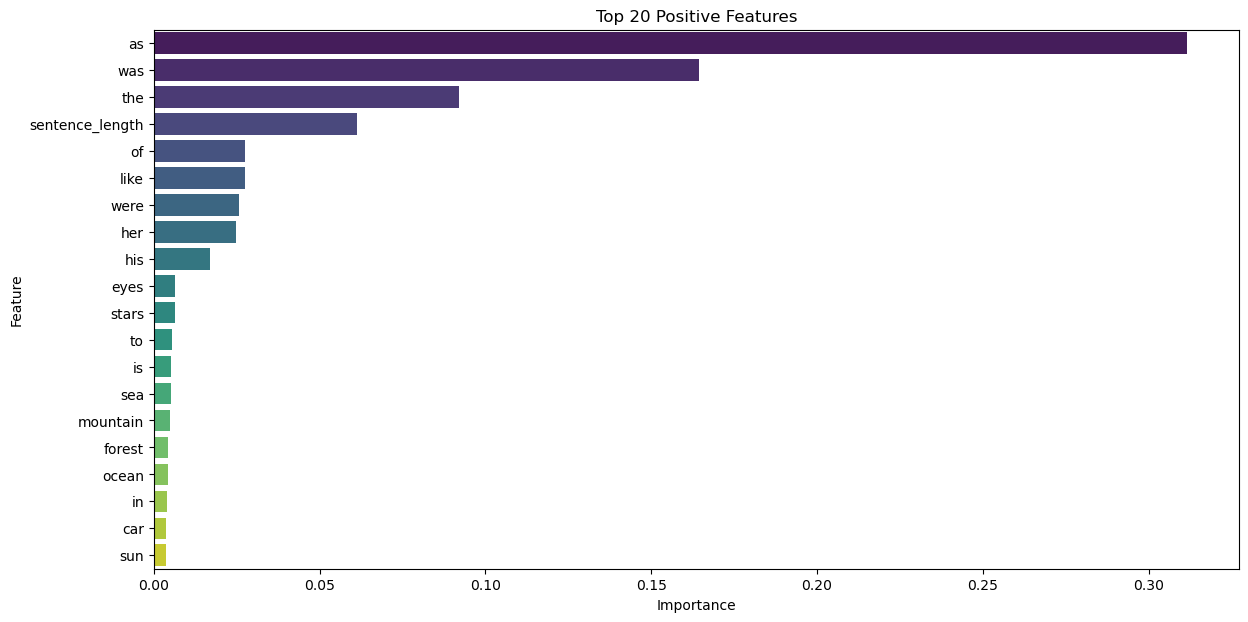

In [10]:
from sklearn.ensemble import RandomForestClassifier
vectorizer = TfidfVectorizer()
sentence_tfidf = vectorizer.fit_transform(X.astype(str)).toarray()

# Create DataFrame for TF-IDF features
tfidf_df = pd.DataFrame(sentence_tfidf, columns=vectorizer.get_feature_names_out())

# Combine TF-IDF features with sentence length
X_combined = pd.concat([tfidf_df, df[['sentence_length']].reset_index(drop=True)], axis=1)

# Fit Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_combined, y_encoded)
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_names = vectorizer.get_feature_names_out().tolist() + ['sentence_length']
top_positive_features = pd.DataFrame({'feature': feature_names, 'importance': importances})
top_positive_features = top_positive_features.sort_values(by='importance', ascending=False)

# Plotting the top features
plt.figure(figsize=(14, 7))
sns.barplot(y='feature', x='importance', data=top_positive_features.head(20), palette='viridis')
plt.title('Top 20 Positive Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [11]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, random_state=42, test_size=0.2)

Model Building

Logistic Regression

In [12]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model1.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        38

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



ANN

In [14]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\Thanuja\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       261,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,705 (1.50 MB)

 Trainable params: 392,705 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
for ele in X_train :
    print(ele)
    break

  (0, 270)	0.7222924235142234
  (0, 494)	0.6041349672119037
  (0, 478)	0.2332956009153811
  (0, 452)	0.24266800143272493


In [18]:
history = model.fit(X_train.toarray(), y_train,
                    epochs=75,
                    batch_size=64,
                    validation_data=(X_test.toarray(), y_test),
                    verbose=2)


# Evaluate the neural network model
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print("Neural Network Accuracy:", accuracy)

Epoch 1/75
5/5 - 5s - 968ms/step - accuracy: 0.5929 - loss: 0.6866 - val_accuracy: 0.4810 - val_loss: 0.6926
Epoch 2/75
5/5 - 0s - 33ms/step - accuracy: 0.6250 - loss: 0.6775 - val_accuracy: 0.4810 - val_loss: 0.6916
Epoch 3/75
5/5 - 0s - 31ms/step - accuracy: 0.6538 - loss: 0.6739 - val_accuracy: 0.4810 - val_loss: 0.6905
Epoch 4/75
5/5 - 0s - 35ms/step - accuracy: 0.6571 - loss: 0.6702 - val_accuracy: 0.4810 - val_loss: 0.6894
Epoch 5/75
5/5 - 0s - 31ms/step - accuracy: 0.6538 - loss: 0.6643 - val_accuracy: 0.4810 - val_loss: 0.6884
Epoch 6/75
5/5 - 0s - 33ms/step - accuracy: 0.6378 - loss: 0.6622 - val_accuracy: 0.4810 - val_loss: 0.6873
Epoch 7/75
5/5 - 0s - 31ms/step - accuracy: 0.6282 - loss: 0.6606 - val_accuracy: 0.4810 - val_loss: 0.6861
Epoch 8/75
5/5 - 0s - 28ms/step - accuracy: 0.6250 - loss: 0.6525 - val_accuracy: 0.4810 - val_loss: 0.6849
Epoch 9/75
5/5 - 0s - 31ms/step - accuracy: 0.6186 - loss: 0.6510 - val_accuracy: 0.4810 - val_loss: 0.6837
Epoch 10/75
5/5 - 0s - 34ms

In [19]:
y_pred_prob = model.predict(X_test.toarray())
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Classification Report:
               precision    recall  f1-score   support

    Metaphor       1.00      0.98      0.99        41
      Simile       0.97      1.00      0.99        38

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



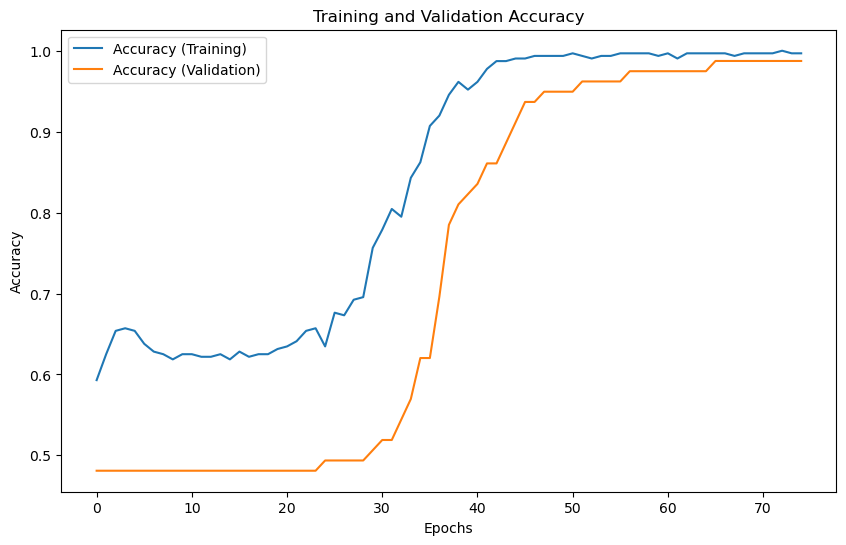

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
import pickle
with open('vector_model.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [22]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump (label_encoder, file)

In [23]:
model.save('trained_model.h5')

In [24]:
new_sentences =[
    "Her smile was as bright as the sun.",
    "The world is a stage, and we are merely players."]
X_new = vectorizer.transform(new_sentences)

In [25]:
nn_probabilities = model.predict(X_new)

nn_predictions = (nn_probabilities > 0.5).astype(int).flatten()

nn_predicted_labels = label_encoder.inverse_transform(nn_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [26]:
for i, sentence in enumerate(new_sentences):
   nn_simile_prob = nn_probabilities[i][0]
   nn_metaphor_prob = 1 - nn_simile_prob

   print(f"Sentence: {sentence}")
   print()
   print(f"Neural Network Prediction: {nn_predicted_labels[i]}")
   print()
   print(f" Probability of being a Simile: {nn_simile_prob:.4f}")
   print(f" Probability of being a Metaphor: {nn_metaphor_prob:.4f}")
   print()

Sentence: Her smile was as bright as the sun.

Neural Network Prediction: Simile

 Probability of being a Simile: 0.9187
 Probability of being a Metaphor: 0.0813

Sentence: The world is a stage, and we are merely players.

Neural Network Prediction: Metaphor

 Probability of being a Simile: 0.1084
 Probability of being a Metaphor: 0.8916

